### Implementing Decision Tree Classifiers 
- It is a machin elarnig method used to classify data into categories like "Yes" or "No" (or) labels such as "Spam" and "Not Spam".

### Working with Decision Tree Classifier:
- Syntax -
  - class.sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, max_features=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=No, ne, ccp_alpha=0.0, monotonic_cst=None)
  - Parametrs -
    - 1. criterion - It measures the quality of a split.Supported values are 'gini', 'entropy', and 'log_loss'.Thedefault value is 'gini'.
      2. splitter - It is used for split at each node.Supported values are 'best' and ' random'.The default value is 'best'.
      3. max_features - No of features to be consider to get best split.
      4. max_depth - maximum depth of the tree.(Default=None)
      5. min_samples_split - minimum no of samples required to split an internal node(default=2).
      6. min_samples_leaf - minimum no of samples required to split be a leaf node(default =1).
      7. max_leaf_nodes - maximum no of posiible leaf nodes.
      8. min_impurity_split- Defines the threshold for early stopping tree growth.
      9. class_weight - The weights associated with classes.
      10. ccp_alpha - It is a complexity parameter used for minimal cost-complexity pruning.

#### 1: Importing Libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


#### 2: Loading the Dataset

In [3]:
iris = load_iris()
X = iris.data  
y = iris.target 

#### 3: Splitting the Dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 99)

#### 4: Defining the Model

In [5]:
clf = DecisionTreeClassifier(random_state=1)

#### 5: Training the Model

In [6]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### 6: Making Predictions

In [7]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


#### 7: Hyperparameter Tuning with Decision Tree Classifier using GridSearchCV

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


#### 8: Visualizing the Decision Tree Classifier

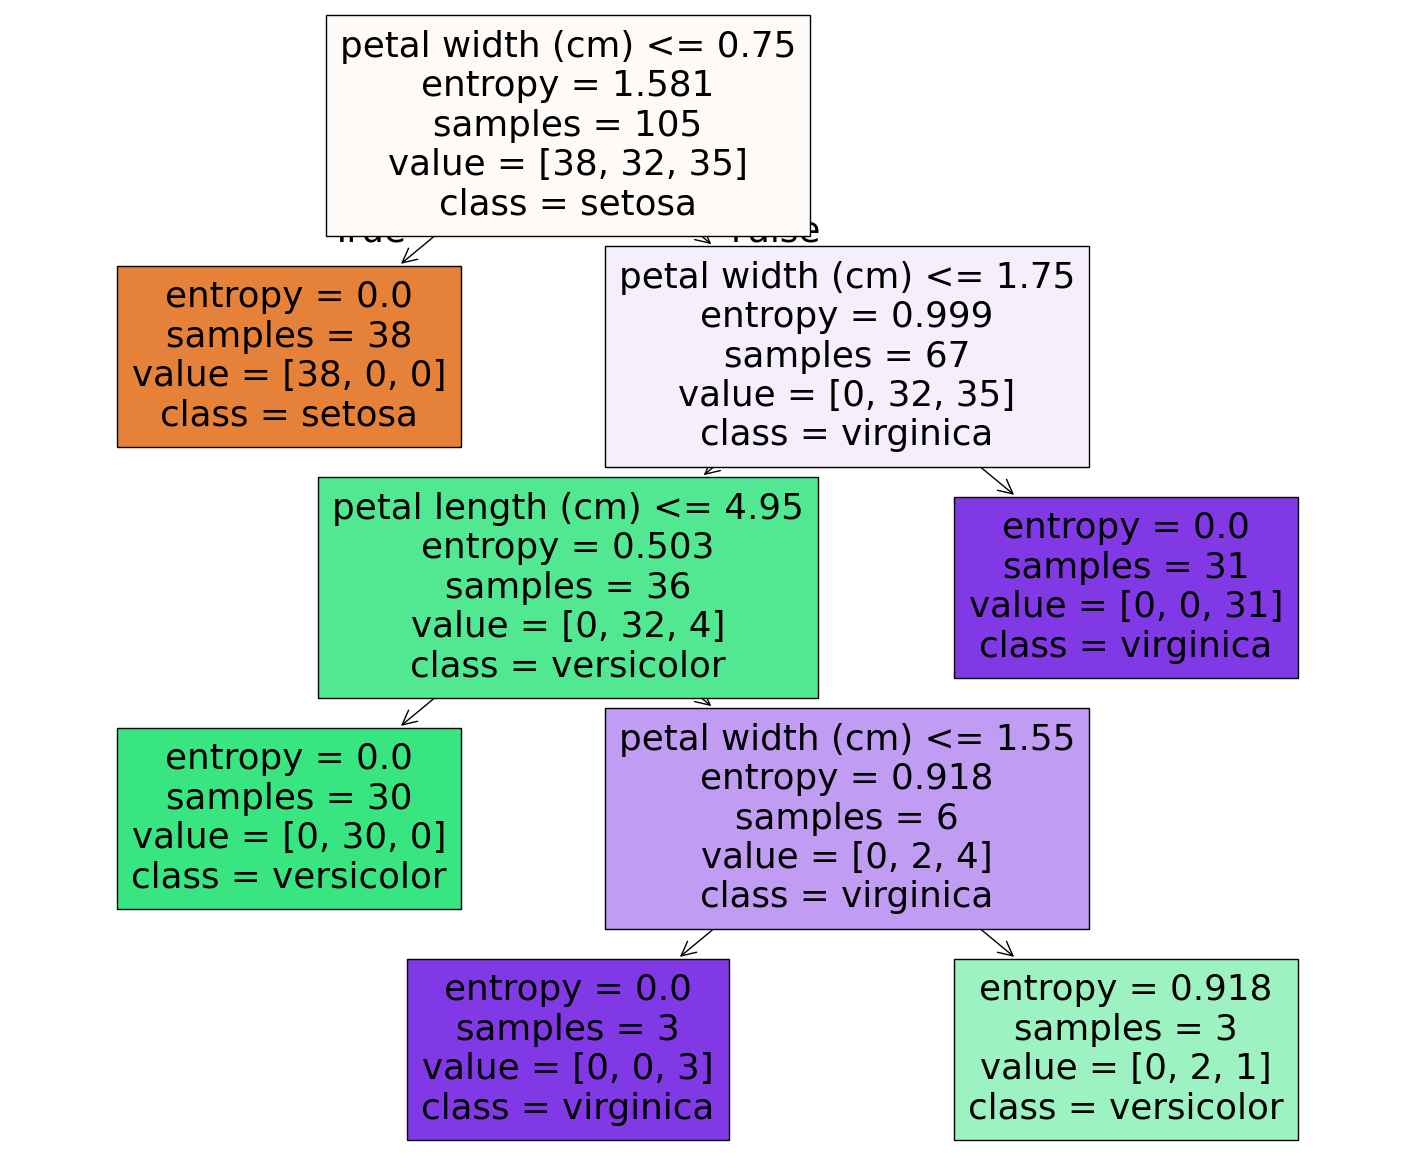

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
tree_clf = grid_search.best_estimator_

plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.show()